In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from pylab import rcParams
rcParams['figure.figsize'] = 13,6
df = pd.read_csv('master.csv', encoding='utf-8')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Построим графики динамики самоубийств Мужчин и Женщин

<AxesSubplot:xlabel='year'>

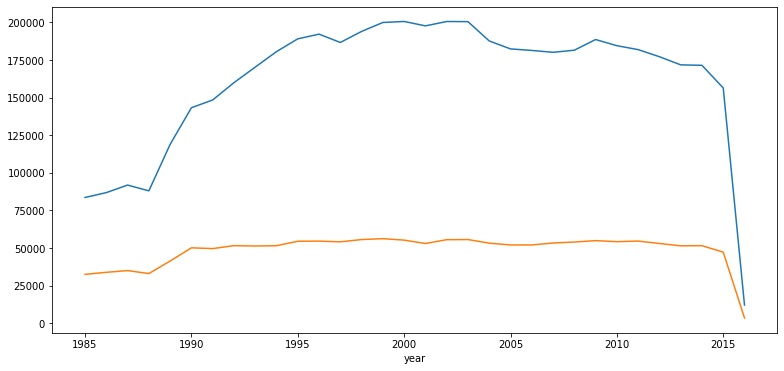

In [18]:
df[df['sex'] == 'male'].groupby('year')['suicides_no'].sum().plot()
df[df['sex'] == 'female'].groupby('year')['suicides_no'].sum().plot()

# Столбчатая диаграмма

In [3]:
df_age = df.groupby('age')["age", 'suicides_no'].sum()
df_age

<ipython-input-3-3bd060d73e8d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df.groupby('age')["age", 'suicides_no'].sum()


,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


<AxesSubplot:title={'center':'Кол-во самоубийств по возрастам за весь период'}, xlabel='Возрастные категории', ylabel='Количество'>

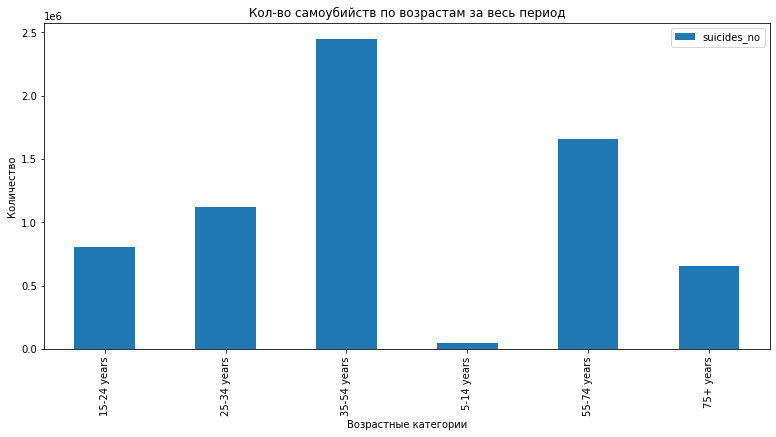

In [9]:
df_age.plot(kind='bar', 
            title='Кол-во самоубийств по возрастам за весь период',
            xlabel='Возрастные категории',
            ylabel='Количество')
## Почему в графике значения по Y от 0 до 2.5? Каким параметром это испрaвить?

In [ ]:
# Данная диаграмма показывает, что за весь период максимальное кол-во самоубийств было в возрастной группе от 35 до 54 лет.
# Как мы можем видеть выше, мужчины совершают намного больше самоубийств.
# Осмелюсь предположить, что такое кол-во именно в этом возрастном диапазоне связано с кризисом среднего возраста у мужчин.

# Столбчатая диаграмма для опрделения стран с максимальным числом самоубийств

In [5]:
df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(15)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Name: suicides_no, dtype: int64

<AxesSubplot:xlabel='country'>

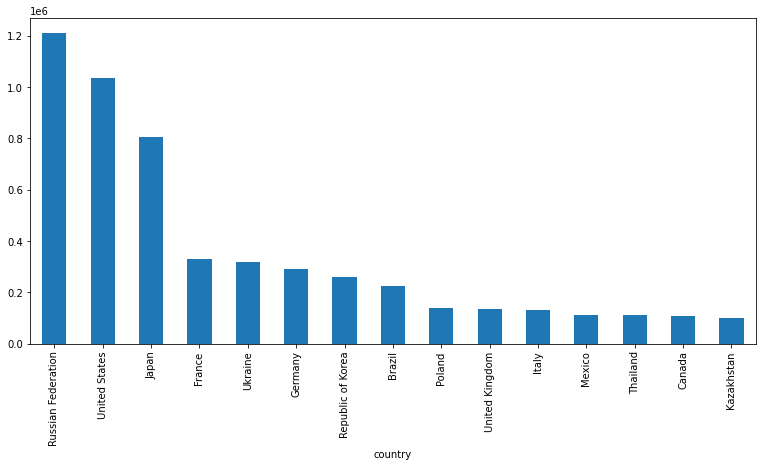

In [6]:
## Тот же вопрос по значениям Y. Почему в графике значения по Y от 0 до 1.2? Каким параметром это испрaвить?
df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(15).plot(kind='bar')

# Диаграмма размаха ("ящик с усами"). Показывает распределение кол-ва самоубийств в год

<AxesSubplot:>

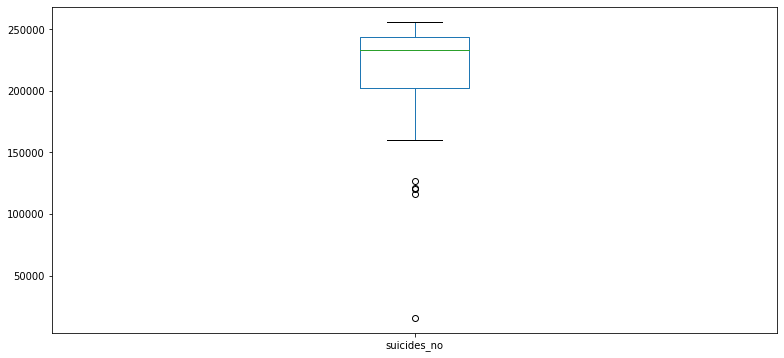

In [11]:
df.groupby('year')['suicides_no'].sum().plot(kind='box')

In [ ]:
# По данному графику видим, что разброс значений находится от 160000 до 250000 смертей в год.
# Значения более смещены к верхней границе.
# Медианное значение находится на уровне примерно 240000 смертей в год.

<AxesSubplot:>

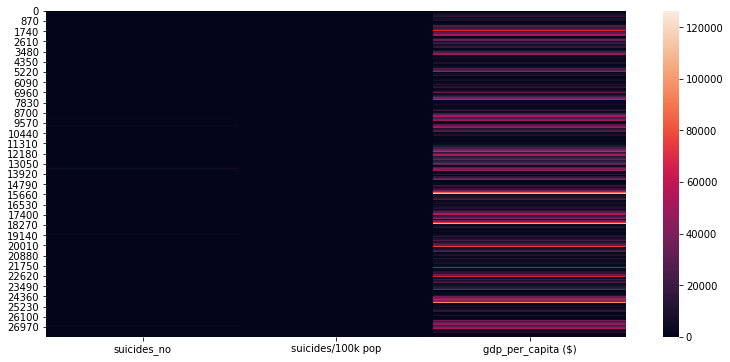

In [6]:
sns.heatmap(df[["suicides_no", 'suicides/100k pop', 'gdp_per_capita ($)']])